In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = 50
pd.options.display.max_rows = 500

In [2]:
rtt_orig_df = pd.read_csv('./data/rtt.csv')
rtt_orig_df.head()

/home/cj2001/notebook_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,2,4,5,9,10,11,12,13,19,20,21,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_key,u_id,name,screen_name,is_troll,u_created_at,u_favourites_count,followers_count,statuses_count,lang,location,time_zone,verified,description,t_id,t_created_at,text,t_favorite_count,retweet_count,retweeted,t.text,user_mentions,tags,reply_to,urls,retweet
0,scottgohard,100345056,#Ezekiel2517✨...,SCOTTGOHARD,1,Tue Dec 29 23:15:22 +0000 2009,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,7.641890e+17,1.471032e+12,Salute brother @iJesseWilliams https://t.co/7...,0.0,0.0,False,Salute brother @iJesseWilliams https://t.co/7...,['ijessewilliams'],NaN,NaN,['https://twitter.com/ijessewilliams/status/76...,NaN
1,scottgohard,100345056,#Ezekiel2517✨...,SCOTTGOHARD,1,Tue Dec 29 23:15:22 +0000 2009,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,7.760564e+17,1.473861e+12,facts https://t.co/OuTm9AdMp3,0.0,0.0,False,NaN,NaN,NaN,NaN,['https://twitter.com/abc7/status/775930633386...,NaN
2,scottgohard,100345056,#Ezekiel2517✨...,SCOTTGOHARD,1,Tue Dec 29 23:15:22 +0000 2009,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,7.848221e+17,1.475951e+12,"@eddiebellz not ""mutt"" @realDonaldTrump",0.0,0.0,False,"@eddiebellz not ""mutt"" @realDonaldTrump",['realdonaldtrump'],NaN,NaN,NaN,NaN
3,scottgohard,100345056,#Ezekiel2517✨...,SCOTTGOHARD,1,Tue Dec 29 23:15:22 +0000 2009,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,7.806023e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['780607504128638976'],NaN,NaN
4,scottgohard,100345056,#Ezekiel2517✨...,SCOTTGOHARD,1,Tue Dec 29 23:15:22 +0000 2009,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,7.910563e+17,1.477437e+12,RT @JohnSmithChgo: @AwooMAGA @kushkandy95 @PWM...,0.0,0.0,False,RT @JohnSmithChgo: @AwooMAGA @kushkandy95 @PWM...,"['jsavite', 'johnsmithchgo', 'kushkandy95', 'a...",NaN,NaN,NaN,['791055623240708096']


In [3]:
rtt_orig_df = rtt_orig_df.drop(['user_key', 'name', 'screen_name', 'u_created_at', 't_created_at', 't_id'], axis=1)
rtt_orig_df.head()

,u_id,is_troll,u_favourites_count,followers_count,statuses_count,lang,location,time_zone,verified,description,text,t_favorite_count,retweet_count,retweeted,t.text,user_mentions,tags,reply_to,urls,retweet
0,100345056,1,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Salute brother @iJesseWilliams https://t.co/7...,0.0,0.0,False,Salute brother @iJesseWilliams https://t.co/7...,['ijessewilliams'],NaN,NaN,['https://twitter.com/ijessewilliams/status/76...,NaN
1,100345056,1,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,facts https://t.co/OuTm9AdMp3,0.0,0.0,False,NaN,NaN,NaN,NaN,['https://twitter.com/abc7/status/775930633386...,NaN
2,100345056,1,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,"@eddiebellz not ""mutt"" @realDonaldTrump",0.0,0.0,False,"@eddiebellz not ""mutt"" @realDonaldTrump",['realdonaldtrump'],NaN,NaN,NaN,NaN
3,100345056,1,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['780607504128638976'],NaN,NaN
4,100345056,1,2774.0,1053.0,31858.0,en,still ⬆️Block⤵️Corner⬇️street,NaN,False,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,RT @JohnSmithChgo: @AwooMAGA @kushkandy95 @PWM...,0.0,0.0,False,RT @JohnSmithChgo: @AwooMAGA @kushkandy95 @PWM...,"['jsavite', 'johnsmithchgo', 'kushkandy95', 'a...",NaN,NaN,NaN,['791055623240708096']


In [4]:
rtt_orig_df.shape

(200847, 20)

In [5]:
rtt_orig_df.describe()

,u_favourites_count,followers_count,statuses_count,t_favorite_count,retweet_count
count,183555.000000,183555.000000,183555.000000,58045.000000,58045.000000
mean,3224.170369,3872.658675,5098.125308,35.518322,39.667861
std,3644.286820,7161.124122,6897.553773,270.288598,290.998068
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1275.000000,1073.000000,1831.000000,0.000000,0.000000
50%,2010.000000,1780.000000,2224.000000,0.000000,0.000000
75%,3518.000000,2464.000000,4267.000000,0.000000,0.000000
max,27181.000000,98412.000000,61735.000000,26655.000000,20494.000000


In [6]:
def has_value(row):

    if str(row) == 'NaN' or str(row) == 'nan':         # In these cases row is a float
        #print(row, type(row), "NOOOO")
        return 0
    else:
        #print(row, type(row), 'yes')
        return 1        

rtt_df = rtt_orig_df
rtt_df['has_location'] = rtt_df['location'].map(has_value)
rtt_df['has_timezone'] = rtt_df['time_zone'].map(has_value)
rtt_df['has_description'] = rtt_df['description'].map(has_value)
rtt_df['has_mentions'] = rtt_df['user_mentions'].map(has_value)
rtt_df['has_tags'] = rtt_df['tags'].map(has_value)
rtt_df['has_reply_to'] = rtt_df['reply_to'].map(has_value)
rtt_df['has_url'] = rtt_df['urls'].map(has_value)
rtt_df['is_retweet'] = rtt_df['retweet'].map(has_value)
rtt_df = rtt_df.drop(['location', 'time_zone', 'description', 'user_mentions', 'tags', 'reply_to', 'urls', 'text', 't.text', 'retweet'], axis=1)
rtt_df.head()

,u_id,is_troll,u_favourites_count,followers_count,statuses_count,lang,verified,t_favorite_count,retweet_count,retweeted,has_location,has_timezone,has_description,has_mentions,has_tags,has_reply_to,has_url,is_retweet
0,100345056,1,2774.0,1053.0,31858.0,en,False,0.0,0.0,False,1,0,1,1,0,0,1,0
1,100345056,1,2774.0,1053.0,31858.0,en,False,0.0,0.0,False,1,0,1,0,0,0,1,0
2,100345056,1,2774.0,1053.0,31858.0,en,False,0.0,0.0,False,1,0,1,1,0,0,0,0
3,100345056,1,2774.0,1053.0,31858.0,en,False,NaN,NaN,NaN,1,0,1,0,0,1,0,0
4,100345056,1,2774.0,1053.0,31858.0,en,False,0.0,0.0,False,1,0,1,1,0,0,0,1


In [7]:
rtt_df.shape

(200847, 18)

In [8]:
def convert_true_false(row):

    if str(row) == 'False' or str(row) == 'NaN' or str(row) == 'nan':
        return 0
    else:
        return 1


rtt_df2 = rtt_df
rtt_df2['is_verified'] = rtt_df['verified'].map(convert_true_false)
rtt_df2['is_retweeted'] = rtt_df['retweeted'].map(convert_true_false)
rtt_df2 = rtt_df2.drop(['verified', 'retweeted'], axis=1)
rtt_df2.head()

,u_id,is_troll,u_favourites_count,followers_count,statuses_count,lang,t_favorite_count,retweet_count,has_location,has_timezone,has_description,has_mentions,has_tags,has_reply_to,has_url,is_retweet,is_verified,is_retweeted
0,100345056,1,2774.0,1053.0,31858.0,en,0.0,0.0,1,0,1,1,0,0,1,0,0,0
1,100345056,1,2774.0,1053.0,31858.0,en,0.0,0.0,1,0,1,0,0,0,1,0,0,0
2,100345056,1,2774.0,1053.0,31858.0,en,0.0,0.0,1,0,1,1,0,0,0,0,0,0
3,100345056,1,2774.0,1053.0,31858.0,en,NaN,NaN,1,0,1,0,0,1,0,0,0,0
4,100345056,1,2774.0,1053.0,31858.0,en,0.0,0.0,1,0,1,1,0,0,0,1,0,0


In [9]:
rtt_df2.shape

(200847, 18)

In [10]:
rtt_df2['lang'].unique()

array(['en', 'ru', 'id', nan, 'de', 'es', 'fr'], dtype=object)

In [11]:
def language_category(row):

    if row == 'en':
        return 1
    elif row == 'ru':
        return 2
    elif row == 'id':
        return 3
    elif row == 'de':
        return 4
    elif row == 'es':
        return 5
    elif row == 'fr':
        return 6
    else:
        return 0


rtt_df3 = rtt_df2
rtt_df3['lang_category'] = rtt_df3['lang'].map(language_category)
rtt_df3 = rtt_df3.drop(['lang'], axis=1)
rtt_df3.head()

,u_id,is_troll,u_favourites_count,followers_count,statuses_count,t_favorite_count,retweet_count,has_location,has_timezone,has_description,has_mentions,has_tags,has_reply_to,has_url,is_retweet,is_verified,is_retweeted,lang_category
0,100345056,1,2774.0,1053.0,31858.0,0.0,0.0,1,0,1,1,0,0,1,0,0,0,1
1,100345056,1,2774.0,1053.0,31858.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0,1
2,100345056,1,2774.0,1053.0,31858.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,1
3,100345056,1,2774.0,1053.0,31858.0,NaN,NaN,1,0,1,0,0,1,0,0,0,0,1
4,100345056,1,2774.0,1053.0,31858.0,0.0,0.0,1,0,1,1,0,0,0,1,0,0,1


In [12]:
rtt_df3.shape

(200847, 18)

In [13]:
rtt_df3.isna().sum()

u_id                    7910
is_troll                   7
u_favourites_count     17292
followers_count        17292
statuses_count         17292
t_favorite_count      142802
retweet_count         142802
has_location               0
has_timezone               0
has_description            0
has_mentions               0
has_tags                   0
has_reply_to               0
has_url                    0
is_retweet                 0
is_verified                0
is_retweeted               0
lang_category              0
dtype: int64

In [14]:
rtt_df3.shape

(200847, 18)

In [15]:
rtt_df3.isna().sum()

u_id                    7910
is_troll                   7
u_favourites_count     17292
followers_count        17292
statuses_count         17292
t_favorite_count      142802
retweet_count         142802
has_location               0
has_timezone               0
has_description            0
has_mentions               0
has_tags                   0
has_reply_to               0
has_url                    0
is_retweet                 0
is_verified                0
is_retweeted               0
lang_category              0
dtype: int64

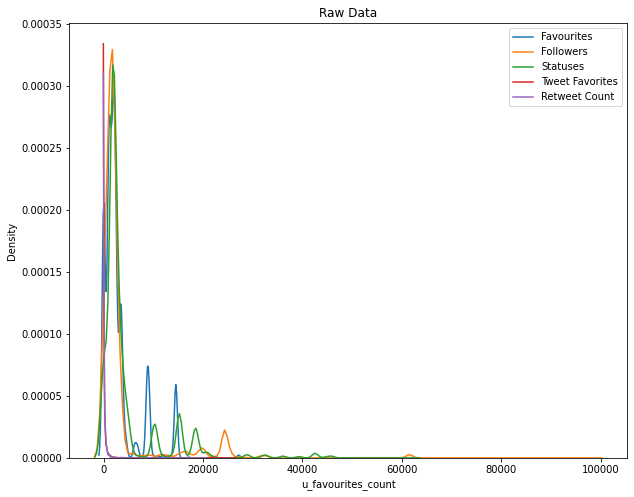

In [16]:
rtt_nonzero_df = rtt_df3.fillna(0.0)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Raw Data')
#ax1.set(xlim = (-2.0, 2.0))
#ax1.get_legend()

sns.kdeplot(rtt_nonzero_df['u_favourites_count'], ax=ax1)
sns.kdeplot(rtt_nonzero_df['followers_count'], ax=ax1)
sns.kdeplot(rtt_nonzero_df['statuses_count'], ax=ax1)
sns.kdeplot(rtt_nonzero_df['t_favorite_count'], ax=ax1)
sns.kdeplot(rtt_nonzero_df['retweet_count'], ax=ax1)

plt.legend(labels = ['Favourites', 'Followers', 'Statuses', 'Tweet Favorites', 'Retweet Count'])

In [17]:
rtt_nonzero_df.values

array([[100345056, 1, 2774.0, ..., 0, 0, 1],
       [100345056, 1, 2774.0, ..., 0, 0, 1],
       [100345056, 1, 2774.0, ..., 0, 0, 1],
       ...,
       [0.0, 1, 0.0, ..., 0, 0, 0],
       [0.0, 1, 0.0, ..., 0, 0, 0],
       [0.0, 1, 0.0, ..., 0, 0, 0]], dtype=object)

In [19]:
scaled_df = rtt_df3.fillna(0.0)
scaled_df.isna().sum()

u_id                  0
is_troll              0
u_favourites_count    0
followers_count       0
statuses_count        0
t_favorite_count      0
retweet_count         0
has_location          0
has_timezone          0
has_description       0
has_mentions          0
has_tags              0
has_reply_to          0
has_url               0
is_retweet            0
is_verified           0
is_retweeted          0
lang_category         0
dtype: int64

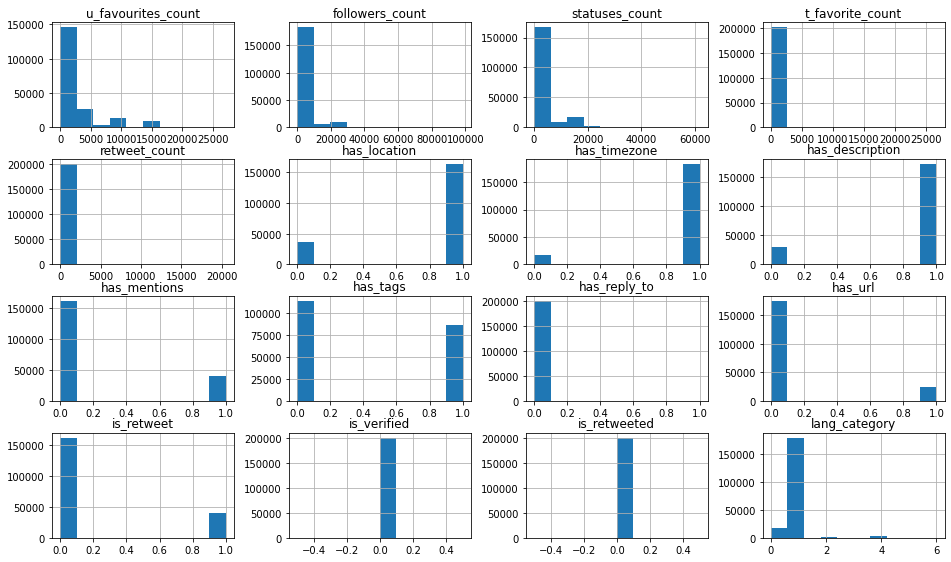

In [20]:
hist = scaled_df.hist(bins=10, layout=(5,4), figsize=(16,12))

In [21]:
scaler = StandardScaler()

scaled_df = rtt_df3.fillna(0.0)
scaled_df[['scaled_favourites_count', 'scaled_followers_count', 'scaled_statuses_count']] = scaler.fit_transform(scaled_df[['u_favourites_count', 'followers_count', 'statuses_count']])
scaled_df[['scaled_t_favorite_count', 'scaled_retweet_count']] = scaler.fit_transform(scaled_df[['t_favorite_count', 'retweet_count']])
scaled_df = scaled_df.drop(['u_favourites_count', 'followers_count', 'statuses_count', 't_favorite_count', 'retweet_count'], axis=1)
scaled_df.head()

,u_id,is_troll,has_location,has_timezone,has_description,has_mentions,has_tags,has_reply_to,has_url,is_retweet,is_verified,is_retweeted,lang_category,scaled_favourites_count,scaled_followers_count,scaled_statuses_count,scaled_t_favorite_count,scaled_retweet_count
0,100345056,1,1,0,1,1,0,0,1,0,0,0,1,-0.047949,-0.358685,4.031113,-0.070215,-0.072803
1,100345056,1,1,0,1,0,0,0,1,0,0,0,1,-0.047949,-0.358685,4.031113,-0.070215,-0.072803
2,100345056,1,1,0,1,1,0,0,0,0,0,0,1,-0.047949,-0.358685,4.031113,-0.070215,-0.072803
3,100345056,1,1,0,1,0,0,1,0,0,0,0,1,-0.047949,-0.358685,4.031113,-0.070215,-0.072803
4,100345056,1,1,0,1,1,0,0,0,1,0,0,1,-0.047949,-0.358685,4.031113,-0.070215,-0.072803


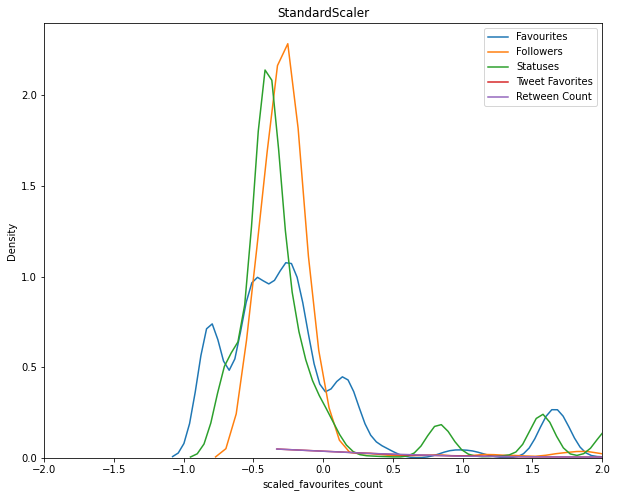

In [22]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('StandardScaler')
ax1.set(xlim = (-2.0, 2.0))
ax1.get_legend()

sns.kdeplot(scaled_df['scaled_favourites_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_followers_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_statuses_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_t_favorite_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_retweet_count'], ax=ax1)

plt.legend(labels = ['Favourites', 'Followers', 'Statuses', 'Tweet Favorites', 'Retween Count'])

In [23]:
scaler = MinMaxScaler()

scaled_df = rtt_df3.fillna(0.0)
scaled_df[['scaled_favourites_count', 'scaled_followers_count', 'scaled_statuses_count']] = scaler.fit_transform(scaled_df[['u_favourites_count', 'followers_count', 'statuses_count']])
scaled_df[['scaled_t_favorite_count', 'scaled_retweet_count']] = scaler.fit_transform(scaled_df[['t_favorite_count', 'retweet_count']])
scaled_df = scaled_df.drop(['u_favourites_count', 'followers_count', 'statuses_count', 't_favorite_count', 'retweet_count'], axis=1)
scaled_df.head()

,u_id,is_troll,has_location,has_timezone,has_description,has_mentions,has_tags,has_reply_to,has_url,is_retweet,is_verified,is_retweeted,lang_category,scaled_favourites_count,scaled_followers_count,scaled_statuses_count,scaled_t_favorite_count,scaled_retweet_count
0,100345056,1,1,0,1,1,0,0,1,0,0,0,1,0.102057,0.0107,0.516044,0.0,0.0
1,100345056,1,1,0,1,0,0,0,1,0,0,0,1,0.102057,0.0107,0.516044,0.0,0.0
2,100345056,1,1,0,1,1,0,0,0,0,0,0,1,0.102057,0.0107,0.516044,0.0,0.0
3,100345056,1,1,0,1,0,0,1,0,0,0,0,1,0.102057,0.0107,0.516044,0.0,0.0
4,100345056,1,1,0,1,1,0,0,0,1,0,0,1,0.102057,0.0107,0.516044,0.0,0.0


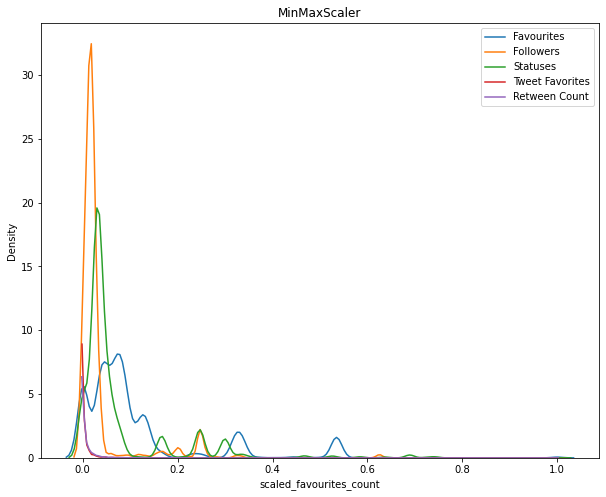

In [24]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('MinMaxScaler')

sns.kdeplot(scaled_df['scaled_favourites_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_followers_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_statuses_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_t_favorite_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_retweet_count'], ax=ax1)

plt.legend(labels = ['Favourites', 'Followers', 'Statuses', 'Tweet Favorites', 'Retween Count'])

In [25]:
scaler = RobustScaler()

scaled_df = rtt_df3.fillna(0.0)
#scaled_df['is_troll'] = scaled_df['is_troll'].astype(str).astype(int)
scaled_df[['scaled_favourites_count', 'scaled_followers_count', 'scaled_statuses_count']] = scaler.fit_transform(scaled_df[['u_favourites_count', 'followers_count', 'statuses_count']])
scaled_df[['scaled_t_favorite_count', 'scaled_retweet_count']] = scaler.fit_transform(scaled_df[['t_favorite_count', 'retweet_count']])
scaled_df = scaled_df.drop(['u_favourites_count', 'followers_count', 'statuses_count', 't_favorite_count', 'retweet_count'], axis=1)
#scaled_df.head()
scaled_df.dtypes

u_id                        object
is_troll                    object
has_location                 int64
has_timezone                 int64
has_description              int64
has_mentions                 int64
has_tags                     int64
has_reply_to                 int64
has_url                      int64
is_retweet                   int64
is_verified                  int64
is_retweeted                 int64
lang_category                int64
scaled_favourites_count    float64
scaled_followers_count     float64
scaled_statuses_count      float64
scaled_t_favorite_count    float64
scaled_retweet_count       float64
dtype: object

In [33]:
#temp = scaled_df.head(5)
#for index, row in temp.iterrows():
#    y = row['is_troll']
#    if type(y) != 'int':
#        print(y)

res = scaled_df[[isinstance(value, str) for value in scaled_df['is_troll']]]
print(len(res))

131065


In [108]:
print(scaled_df.dtypes)

u_id                        object
is_troll                    object
has_location                 int64
has_timezone                 int64
has_description              int64
has_mentions                 int64
has_tags                     int64
has_reply_to                 int64
has_url                      int64
is_retweet                   int64
is_verified                  int64
is_retweeted                 int64
lang_category                int64
scaled_favourites_count    float64
scaled_followers_count     float64
scaled_statuses_count      float64
scaled_t_favorite_count    float64
scaled_retweet_count       float64
dtype: object


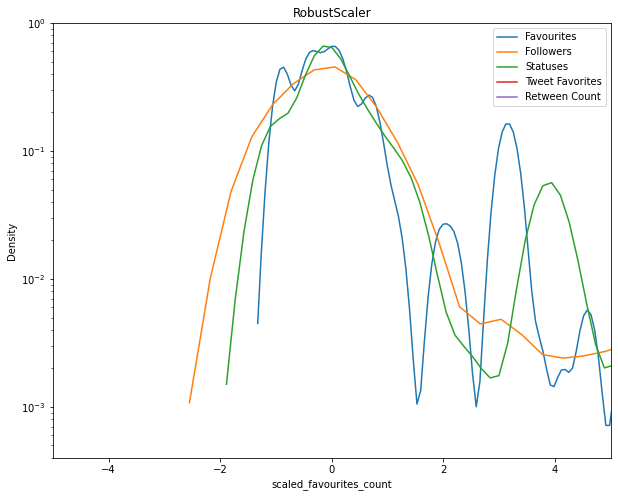

In [89]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('RobustScaler')
ax1.set(ylim = (0.0004, 1.0))
ax1.set(xlim = (-5.0, 5.0))
ax1.set_yscale('log')

sns.kdeplot(scaled_df['scaled_favourites_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_followers_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_statuses_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_t_favorite_count'], ax=ax1)
sns.kdeplot(scaled_df['scaled_retweet_count'], ax=ax1)

plt.legend(labels = ['Favourites', 'Followers', 'Statuses', 'Tweet Favorites', 'Retween Count'])

In [104]:
def modeler(df, subset_features, k_folds=5, model='linear', show_matrix=True):

    acc_scores = []
    
    df['is_troll_int'] = df['is_troll'].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(scaled_df[subset_features], 
                                                        scaled_df['is_troll_int'], 
                                                        test_size=0.25,
                                                        random_state=42)
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

    print(y_train[0:5])
    
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    for i in range(0, k_folds):
        
        clf = svm.SVC(kernel='linear')
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = accuracy_score(pred, y_test)
        acc_scores.append(acc)
    
    print('Accuracy scores: ', acc_scores)
    print('Mean accuracy: ', np.mean(acc_scores))
    
    if show_matrix:
        matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
        plt.show(matrix)
        plt.show()
    
    return

In [105]:
subset_features = ['scaled_favourites_count', 'scaled_followers_count', 
                   'scaled_statuses_count', 'scaled_t_favorite_count', 
                   'scaled_retweet_count']

modeler(scaled_df, subset_features)

ValueError: invalid literal for int() with base 10: 'RT @mrcox6150: WAKEUP AMERICA: HILLARY CAMP FREAKING OUT OVER PHOTO. ABOUT 30 PEOPLE ATTENDED KANE RALLY. VOTE TRUMP I DID! '

In [84]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)